In [1]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Training letters images and labels files
letters_training_images_file_path = r"C:\Users\h.d\Downloads\Arabic Handwritten Characters Dataset CSV-20220307T015553Z-001\Arabic Handwritten Characters Dataset CSV\training images.zip"
letters_training_labels_file_path = r"C:\Users\h.d\Downloads\Arabic Handwritten Characters Dataset CSV-20220307T015553Z-001\Arabic Handwritten Characters Dataset CSV\training labels.zip"
letters_testing_images_file_path = r"C:\Users\h.d\Downloads\Arabic Handwritten Characters Dataset CSV-20220307T015553Z-001\Arabic Handwritten Characters Dataset CSV\testing images.zip"
letters_testing_labels_file_path = r"C:\Users\h.d\Downloads\Arabic Handwritten Characters Dataset CSV-20220307T015553Z-001\Arabic Handwritten Characters Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

In [3]:
# print statistics about the dataset
print("There are %d training arabic letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing arabic letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()

There are 13440 training arabic letter images of 64x64 pixels.
There are 3360 testing arabic letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def convert_values_to_image(image_values, display=False):
    image_array = np.asarray(image_values)
    image_array = image_array.reshape(64, 64).astype('uint8')
    # The original dataset is reflected so we will flip it then rotate for a better view only.
    image_array = np.flip(image_array, 0)
    image_array = rotate(image_array, -90)
    new_image = Image.fromarray(image_array)
    if display == True:
        new_image.show()
    return new_image

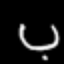

In [5]:
convert_values_to_image(training_letters_images.loc[10], True)


In [ ]:
convert_values_to_image(training_letters_images.loc[100], True)


In [ ]:
convert_values_to_image(training_letters_images.loc[1000], True)


In [6]:
training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [7]:
# !pip install keras

In [9]:
# from keras.utils import to_categorical1
from tensorflow.keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 38
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)

In [10]:
# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])
print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)

(13440, 64, 64, 1) (13440, 38) (3360, 64, 64, 1) (3360, 38)


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
    # create model
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling2D())
  
    #Fully connected final layer
    model.add(Dense(38, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

In [13]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
    parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


In [28]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_letters_images_scaled, training_letters_labels_encoded,
                   validation_data=(testing_letters_images_scaled, testing_letters_labels_encoded),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 109s 154ms/step - loss: 1.5019 - accuracy: 0.5736 - val_loss: 1.4673 - val_accuracy: 0.6467
Epoch 2/5
672/672 [==============================] - 101s 151ms/step - loss: 0.4418 - accuracy: 0.8748 - val_loss: 0.7352 - val_accuracy: 0.7735
Epoch 3/5
672/672 [==============================] - 103s 154ms/step - loss: 0.2932 - accuracy: 0.9117 - val_loss: 0.5464 - val_accuracy: 0.8396
Epoch 4/5
672/672 [==============================] - 102s 151ms/step - loss: 0.2356 - accuracy: 0.9278 - val_loss: 0.5959 - val_accuracy: 0.8122
Epoch 5/5
672/672 [==============================] - 102s 151ms/step - loss: 0.1998 - accuracy: 0.9362 - val_loss: 3.9512 - val_accuracy: 0.4167
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 103s 152ms/step - loss: 1.2645 - accuracy: 0.6574 - val_loss: 3

Epoch 4/5
672/672 [==============================] - 101s 150ms/step - loss: 0.2549 - accuracy: 0.9272 - val_loss: 1.8818 - val_accuracy: 0.5176
Epoch 5/5
672/672 [==============================] - 102s 151ms/step - loss: 0.2105 - accuracy: 0.9365 - val_loss: 1.3232 - val_accuracy: 0.6414
{'optimizer': 'Nadam', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 106s 155ms/step - loss: 1.3343 - accuracy: 0.6497 - val_loss: 0.8101 - val_accuracy: 0.7812
Epoch 2/5
672/672 [==============================] - 111s 165ms/step - loss: 0.4011 - accuracy: 0.8955 - val_loss: 0.8271 - val_accuracy: 0.7702
Epoch 3/5
672/672 [==============================] - 104s 155ms/step - loss: 0.2670 - accuracy: 0.9273 - val_loss: 15.6063 - val_accuracy: 0.0958
Epoch 4/5
672/672 [==============================] - 104s 154ms/step - loss: 0.2209 - accuracy: 0.9361 - val_loss: 17.8626 - val_accuracy: 0.1324
Epoch 5/5
672/672 [==============================]

In [ ]:
# Optimizer: Adam
# Kernel_initializer: normal
# Activation: relu

In [14]:
model = create_model(optimizer='Adam', kernel_initializer='normal', activation='relu')


In [16]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_letters_images_scaled, training_letters_labels_encoded, 
                    validation_data=(testing_letters_images_scaled, testing_letters_labels_encoded),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
672/672 [==============================] - ETA: 0s - loss: 1.6462 - accuracy: 0.5435
Epoch 1: val_loss improved from inf to 0.76505, saving model to weights.hdf5
672/672 [==============================] - 92s 129ms/step - loss: 1.6462 - accuracy: 0.5435 - val_loss: 0.7651 - val_accuracy: 0.8443
Epoch 2/10
672/672 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.8656
Epoch 2: val_loss did not improve from 0.76505
672/672 [==============================] - 87s 129ms/step - loss: 0.5168 - accuracy: 0.8656 - val_loss: 5.7948 - val_accuracy: 0.2461
Epoch 3/10
672/672 [==============================] - ETA: 0s - loss: 0.3133 - accuracy: 0.9124
Epoch 3: val_loss did not improve from 0.76505
672/672 [==============================] - 87s 130ms/step - loss: 0.3133 - accuracy: 0.9124 - val_loss: 1.5789 - val_accuracy: 0.6592
Epoch 4/10
672/672 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9285
Epoch 4: val_loss improved from 0.76505 to 

In [26]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
  # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16) 

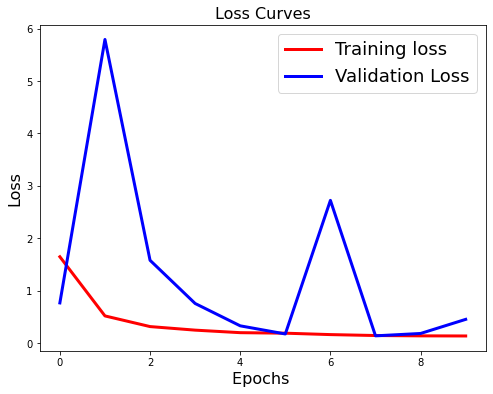

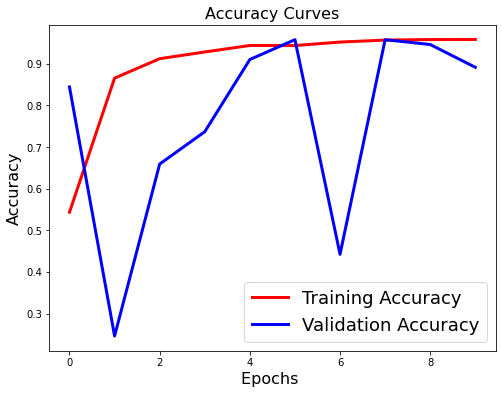

In [27]:
plot_loss_accuracy(history)


In [28]:
model.load_weights('weights.hdf5')


In [30]:
# Final evaluation of the model
metrics = model.evaluate(testing_letters_images_scaled, testing_letters_labels_encoded, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 7s 60ms/step - loss: 0.1365 - accuracy: 0.9580
Test Accuracy: 0.9580357074737549
Test Loss: 0.1365424245595932


Epoch 1/20
672/672 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9570
Epoch 1: val_loss improved from inf to 0.31284, saving model to weights.hdf5
672/672 [==============================] - 89s 132ms/step - loss: 0.1351 - accuracy: 0.9570 - val_loss: 0.3128 - val_accuracy: 0.9360
Epoch 2/20
672/672 [==============================] - ETA: 0s - loss: 0.1306 - accuracy: 0.9577
Epoch 2: val_loss improved from 0.31284 to 0.30929, saving model to weights.hdf5
672/672 [==============================] - 83s 123ms/step - loss: 0.1306 - accuracy: 0.9577 - val_loss: 0.3093 - val_accuracy: 0.9095
Epoch 3/20
672/672 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9638
Epoch 3: val_loss improved from 0.30929 to 0.17059, saving model to weights.hdf5
672/672 [==============================] - 83s 124ms/step - loss: 0.1205 - accuracy: 0.9638 - val_loss: 0.1706 - val_accuracy: 0.9577
Epoch 4/20
672/672 [==============================] - ETA: 0s - loss: 0

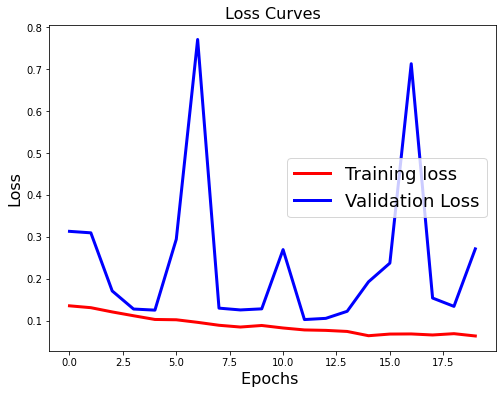

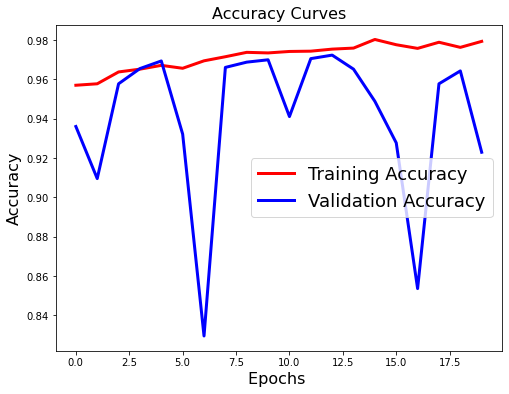

In [32]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_letters_images_scaled, training_letters_labels_encoded, 
                    validation_data=(testing_letters_images_scaled, testing_letters_labels_encoded),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

In [34]:
# Final evaluation of the model
metrics = model.evaluate(testing_letters_images_scaled, testing_letters_labels_encoded, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 7s 61ms/step - loss: 0.1023 - accuracy: 0.9705
Test Accuracy: 0.9705356955528259
Test Loss: 0.10227698087692261


In [45]:
from keras.models import model_from_json

In [46]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [47]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [49]:
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
